### First explore the dataset using a standard distribution (non-custom build) of yt

In [1]:
import yt
import h5py 
import numpy as np

In [15]:
f = h5py.File("/Users/madicken/Documents/denovo_datasets/kelly-denovo-forward.out.h5")

In [17]:
flux = f["/denovo/flux"]

In [18]:
dimnames = [dim.label for dim in flux.dims]

In [19]:
dimnames

['g', 'z', 'y', 'x']

In [26]:
list(f["/denovo"].keys())

['block',
 'db',
 'diagnostics',
 'flux',
 'group_bounds_n',
 'log',
 'mesh_g',
 'mesh_x',
 'mesh_y',
 'mesh_z',
 'peak_memory',
 'properties',
 'quadrature_angles',
 'quadrature_weights',
 'silo_output',
 'source',
 'timers']

In [27]:
yt.load_hexahedral_mesh

<function yt.frontends.stream.data_structures.load_hexahedral_mesh>

In [28]:
mesh_g = f["/denovo/mesh_g"][:]
mesh_x = f["/denovo/mesh_x"][:]
mesh_y = f["/denovo/mesh_y"][:]
mesh_z = f["/denovo/mesh_z"][:]
coords, conn = yt.hexahedral_connectivity(mesh_x, mesh_y, mesh_z)
bbox = np.array([[mesh_x.min(), mesh_x.max()], [mesh_y.min(), mesh_y.max()], [mesh_z.min(), mesh_z.max()]])

In [29]:
flux = f["/denovo/source"][:]
data = { 'group_%03i' % i : (flux[i,...].transpose().copy(),'1/code_length**2') for i in range(27)}

In [30]:
ds = yt.load_hexahedral_mesh(data, conn, coords, bbox= np.array([[mesh_x.min(), mesh_x.max()], [mesh_y.min(), mesh_y.max()], [mesh_z.min(), mesh_z.max()]]))

yt : [INFO     ] 2018-04-17 14:15:53,079 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-04-17 14:15:53,080 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2018-04-17 14:15:53,081 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-04-17 14:15:53,083 Parameters: domain_right_edge         = [  53.   50.  140.]
yt : [INFO     ] 2018-04-17 14:15:53,084 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2018-04-17 14:16:21,749 xlim = 0.000000 140.000000
yt : [INFO     ] 2018-04-17 14:16:21,751 ylim = 0.000000 53.000000
yt : [INFO     ] 2018-04-17 14:16:21,753 xlim = 0.000000 140.000000
yt : [INFO     ] 2018-04-17 14:16:21,755 ylim = 0.000000 53.000000
yt : [INFO     ] 2018-04-17 14:16:21,756 Making a fixed resolution buffer of (('stream', 'group_024')) 800 by 800



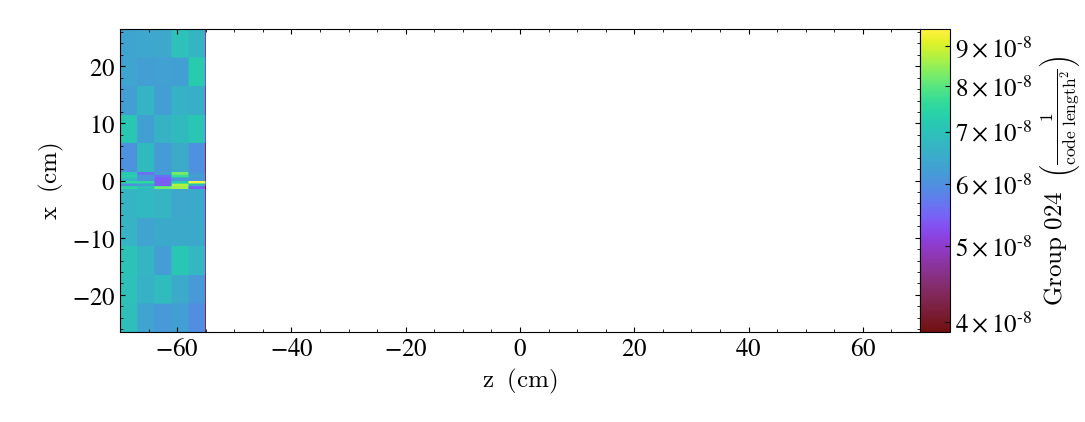

In [33]:
yt.SlicePlot(ds, "y", "group_024")

In [9]:
import ipywidgets

In [10]:
@ipywidgets.interact(group = (0, 27, 1))
def make_slice(group = 0):
    s = yt.SlicePlot(ds, "z", "group_%03i" % group)
    s.show()

Widget Javascript not detected.  It may not be installed or enabled properly.


In [11]:
ds.all_data()

YTRegion (HexahedralMeshData): , center=[ 26.5  25.   70. ] cm, left_edge=[ 0.  0.  0.] cm, right_edge=[  53.   50.  140.] cm

In [12]:
ds.unit_system

cgs Unit System
 Base Units:
  length: cm
  mass: g
  time: s
  temperature: K
  angle: rad
 Other Units:
  energy: erg
  specific_energy: erg/g
  pressure: dyne/cm**2
  force: dyne
  magnetic_field_cgs: gauss
  charge_cgs: esu
  current_cgs: statA

In [13]:
ds.parameters

{'CosmologyCurrentRedshift': 1.0,
 'CosmologyHubbleConstantNow': 1.0,
 'CurrentTimeIdentifier': 1523635710.570076,
 'EOSType': -1,
 'HydroMethod': -1}

In [14]:
ds.field_list

[('stream', 'group_000'),
 ('stream', 'group_001'),
 ('stream', 'group_002'),
 ('stream', 'group_003'),
 ('stream', 'group_004'),
 ('stream', 'group_005'),
 ('stream', 'group_006'),
 ('stream', 'group_007'),
 ('stream', 'group_008'),
 ('stream', 'group_009'),
 ('stream', 'group_010'),
 ('stream', 'group_011'),
 ('stream', 'group_012'),
 ('stream', 'group_013'),
 ('stream', 'group_014'),
 ('stream', 'group_015'),
 ('stream', 'group_016'),
 ('stream', 'group_017'),
 ('stream', 'group_018'),
 ('stream', 'group_019'),
 ('stream', 'group_020'),
 ('stream', 'group_021'),
 ('stream', 'group_022'),
 ('stream', 'group_023'),
 ('stream', 'group_024'),
 ('stream', 'group_025'),
 ('stream', 'group_026')]

In [15]:
if 'group_000' in ds.field_list:
    print("field found")
else:
    print("field not found")

field not found


In [16]:
type(ds.field_list[0][1])

str

In [17]:
params = {}
for key in f["/denovo"].keys():
    checkobj = f["/denovo/{}".format(key)]
    # print("/denovo/{}".format(key))
    if isinstance(checkobj, h5py.Dataset):
        print("Dataset is {}".format(key))
        params[key]=checkobj.value
    if isinstance(checkobj, h5py.Group):
        print("Group is {}".format(key))
    # if 'mesh' in key:
        # print(key)

Dataset is block
Group is db
Group is diagnostics
Dataset is flux
Dataset is group_bounds_n
Dataset is log
Dataset is mesh_g
Dataset is mesh_x
Dataset is mesh_y
Dataset is mesh_z
Dataset is peak_memory
Group is properties
Dataset is quadrature_angles
Dataset is quadrature_weights
Dataset is silo_output
Dataset is source
Dataset is timers


In [18]:
params = {}
for key,val in f["/denovo"].items():
    # checkobj = f["/denovo/{}".format(key)]
    # print("/denovo/{}".format(key))
    if isinstance(val, h5py.Dataset):
        if any([key == 'flux', key == 'source']):
            pass
        else:
            print("Dataset is {}".format(key))
            params[key]=val.value
            # params[key]=f["/denovo/{}".format(key)].value
    if isinstance(val, h5py.Group):
        print("Group is {}".format(key))
    # if 'mesh' in key:
        # print(key)

Dataset is block
Group is db
Group is diagnostics
Dataset is group_bounds_n
Dataset is log
Dataset is mesh_g
Dataset is mesh_x
Dataset is mesh_y
Dataset is mesh_z
Dataset is peak_memory
Group is properties
Dataset is quadrature_angles
Dataset is quadrature_weights
Dataset is silo_output
Dataset is timers


In [19]:
print(params.keys())

dict_keys(['block', 'group_bounds_n', 'log', 'mesh_g', 'mesh_x', 'mesh_y', 'mesh_z', 'peak_memory', 'quadrature_angles', 'quadrature_weights', 'silo_output', 'timers'])


In [20]:
print(params['mesh_x'])

[  0.    5.   10.   15.   20.   25.   25.5  26.   26.5  27.   27.5  28.
  33.   38.   43.   48.   53. ]


In [21]:
log = f["/denovo/group_bounds_n"][:]
print(log)

[  2.00000000e+07   6.37630000e+06   3.01190000e+06   1.82680000e+06
   1.42270000e+06   9.07180000e+05   4.07620000e+05   1.11090000e+05
   1.50340000e+04   3.03540000e+03   5.82950000e+02   1.01300000e+02
   2.90230000e+01   1.06770000e+01   3.05900000e+00   1.85540000e+00
   1.30000000e+00   1.12530000e+00   1.00000000e+00   8.00000000e-01
   4.13990000e-01   3.25000000e-01   2.25000000e-01   1.00000000e-01
   5.00000000e-02   3.00000000e-02   1.00000000e-02   1.00000000e-05]


Note: The items in /denovo/db seem to list which fields can be read in. But they are not guaranteed to have the dimensionality of the fields that we will plot yet. 

In [22]:
denovodb = {}
for key,val in f["/denovo/db/hdf5_db"].items():
    print(key, val.value)

angular_flux False
angular_mesh True
block True
current False
flux True
mat False
source True


In [23]:
flist = [("denovo", key) for key, val in f["/denovo/db/hdf5_db"].items() if val.value]

In [24]:
print(flist)

[('denovo', 'angular_mesh'), ('denovo', 'block'), ('denovo', 'flux'), ('denovo', 'source')]


In [25]:
if ('denovo','angular_mesh') in flist:
    print('found it!')

found it!


In [26]:
group0 = f["/denovo/flux"][0,:].transpose()

In [27]:
np.shape(group0)

(16, 50, 65)

In [28]:
type(group0)

numpy.ndarray

In [29]:
np.shape(data['group_000'])

(2,)

In [30]:
group00= group0.transpose()

In [31]:
np.shape(group00)

(65, 50, 16)

### Now try loading a custom build with my new frontend

In [1]:
import yt
import h5py 
import numpy as np

In [2]:
kfile = "/Users/madicken/Documents/denovo_datasets/kelly-denovo-forward.out.h5"

In [3]:
ds2 = yt.load(kfile)

yt : [INFO     ] 2018-04-18 14:33:07,521 calculating domain boundaries
yt : [INFO     ] 2018-04-18 14:33:07,535 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-04-18 14:33:07,536 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2018-04-18 14:33:07,538 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-04-18 14:33:07,540 Parameters: domain_right_edge         = [  53.   50.  140.]
yt : [INFO     ] 2018-04-18 14:33:07,542 Parameters: cosmological_simulation   = 0


In [4]:
ds2.parameters.keys()

dict_keys(['group_bounds_n', 'log', 'mesh_g', 'mesh_x', 'mesh_y', 'mesh_z', 'peak_memory', 'quadrature_angles', 'quadrature_weights', 'silo_output', 'timers'])

In [5]:
ds2.index

In [6]:
ds2.field_list

[('egroup_000', 'flux'),
 ('egroup_000', 'source'),
 ('egroup_001', 'flux'),
 ('egroup_001', 'source'),
 ('egroup_002', 'flux'),
 ('egroup_002', 'source'),
 ('egroup_003', 'flux'),
 ('egroup_003', 'source'),
 ('egroup_004', 'flux'),
 ('egroup_004', 'source'),
 ('egroup_005', 'flux'),
 ('egroup_005', 'source'),
 ('egroup_006', 'flux'),
 ('egroup_006', 'source'),
 ('egroup_007', 'flux'),
 ('egroup_007', 'source'),
 ('egroup_008', 'flux'),
 ('egroup_008', 'source'),
 ('egroup_009', 'flux'),
 ('egroup_009', 'source'),
 ('egroup_010', 'flux'),
 ('egroup_010', 'source'),
 ('egroup_011', 'flux'),
 ('egroup_011', 'source'),
 ('egroup_012', 'flux'),
 ('egroup_012', 'source'),
 ('egroup_013', 'flux'),
 ('egroup_013', 'source'),
 ('egroup_014', 'flux'),
 ('egroup_014', 'source'),
 ('egroup_015', 'flux'),
 ('egroup_015', 'source'),
 ('egroup_016', 'flux'),
 ('egroup_016', 'source'),
 ('egroup_017', 'flux'),
 ('egroup_017', 'source'),
 ('egroup_018', 'flux'),
 ('egroup_018', 'source'),
 ('egroup_01

In [7]:
ds2.fluid_types

('gas',
 'deposit',
 'index',
 'denovo',
 'egroup_000',
 'egroup_001',
 'egroup_002',
 'egroup_003',
 'egroup_004',
 'egroup_005',
 'egroup_006',
 'egroup_007',
 'egroup_008',
 'egroup_009',
 'egroup_010',
 'egroup_011',
 'egroup_012',
 'egroup_013',
 'egroup_014',
 'egroup_015',
 'egroup_016',
 'egroup_017',
 'egroup_018',
 'egroup_019',
 'egroup_020',
 'egroup_021',
 'egroup_022',
 'egroup_023',
 'egroup_024',
 'egroup_025',
 'egroup_026')

In [6]:
dir(ds2.fields)

['denovo',
 'egroup_000',
 'egroup_001',
 'egroup_002',
 'egroup_003',
 'egroup_004',
 'egroup_005',
 'egroup_006',
 'egroup_007',
 'egroup_008',
 'egroup_009',
 'egroup_010',
 'egroup_011',
 'egroup_012',
 'egroup_013',
 'egroup_014',
 'egroup_015',
 'egroup_016',
 'egroup_017',
 'egroup_018',
 'egroup_019',
 'egroup_020',
 'egroup_021',
 'egroup_022',
 'egroup_023',
 'egroup_024',
 'egroup_025',
 'egroup_026',
 'gas',
 'index']

In [8]:
ds2.parameters['mesh_x']

array([  0. ,   5. ,  10. ,  15. ,  20. ,  25. ,  25.5,  26. ,  26.5,
        27. ,  27.5,  28. ,  33. ,  38. ,  43. ,  48. ,  53. ])

In [10]:
for field in ds2.fields.egroup_000:
    print(field)

On-Disk Field (egroup_000, flux): (units:  1 / code_length**2, display_name: '\phi')
On-Disk Field (egroup_000, source): (units: 1)
Alias Field for "('index', 'cell_volume')" (egroup_000, cell_volume): (units: code_length**3)
Alias Field for "('index', 'vertex_x')" (egroup_000, vertex_x): (units: code_length)
Alias Field for "('index', 'vertex_y')" (egroup_000, vertex_y): (units: code_length)
Alias Field for "('index', 'dx')" (egroup_000, dx): (units: code_length)
Alias Field for "('index', 'vertex_z')" (egroup_000, vertex_z): (units: code_length)
Alias Field for "('index', 'dy')" (egroup_000, dy): (units: code_length)
Alias Field for "('index', 'path_element_x')" (egroup_000, path_element_x): (units: code_length)
Alias Field for "('index', 'z')" (egroup_000, z): (units: code_length)
Alias Field for "('index', 'x')" (egroup_000, x): (units: code_length)
Alias Field for "('index', 'y')" (egroup_000, y): (units: code_length)
Alias Field for "('index', 'path_element_y')" (egroup_000, path

In [9]:
np.shape(ds2.r[('egroup_000','flux')])

(52000,)

In [7]:
maxval, maxloc = ds2.find_max(('egroup_005', 'flux'))
print(maxval)
minval, minloc = ds2.find_min(('egroup_005', 'flux'))
print(minval)

yt : [INFO     ] 2018-04-18 14:20:43,371 Max Value is 7.12634e+04 at 25.2500000000000000 22.5000000000000000 7.5000000000000000


71263.37225033501 code_length**(-2)


yt : [INFO     ] 2018-04-18 14:20:43,416 Min Value is 4.86514e-05 at 50.5000000000000000 0.5000000000000000 139.0000000000000000


4.865143501183287e-05 code_length**(-2)


In [8]:
maxval, maxloc = ds2.find_max('flux')
print(maxval)
minval, minloc = ds2.find_min('flux')
print(minval)

yt : [INFO     ] 2018-04-18 14:20:45,499 Max Value is 4.57604e+03 at 25.2500000000000000 22.5000000000000000 7.5000000000000000


4576.043270404378 code_length**(-2)


yt : [INFO     ] 2018-04-18 14:20:45,532 Min Value is 1.32960e-04 at 27.7500000000000000 0.5000000000000000 139.0000000000000000


0.00013296007804366946 code_length**(-2)


yt : [INFO     ] 2018-04-18 14:34:05,287 xlim = 0.000000 140.000000
yt : [INFO     ] 2018-04-18 14:34:05,288 ylim = 0.000000 53.000000
yt : [INFO     ] 2018-04-18 14:34:05,290 xlim = 0.000000 140.000000
yt : [INFO     ] 2018-04-18 14:34:05,290 ylim = 0.000000 53.000000
yt : [INFO     ] 2018-04-18 14:34:05,298 Making a fixed resolution buffer of (('egroup_026', 'flux')) 800 by 800



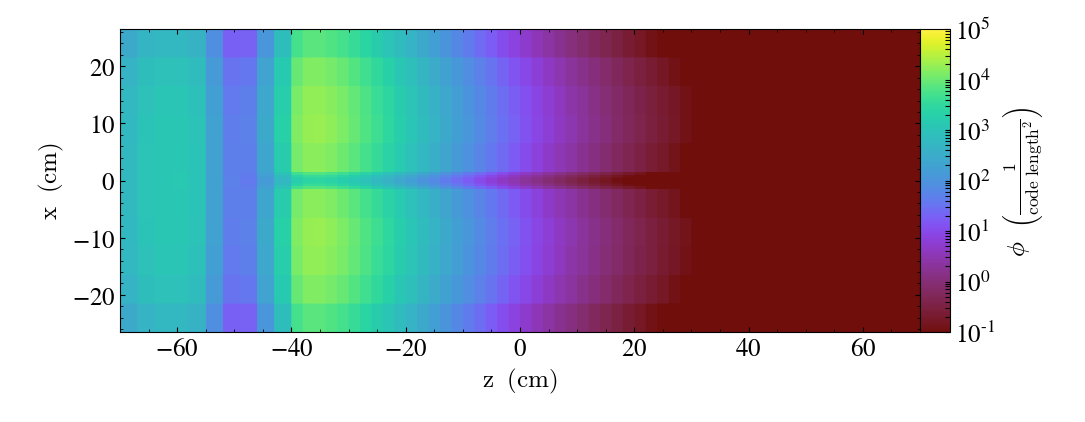

In [8]:
plota = yt.SlicePlot(ds2, "y", fields=('egroup_026','flux'))
plota.set_log('flux', True)
plota.set_zlim('flux', 1e-1, 1e5)
plota

yt : [INFO     ] 2018-04-13 11:08:36,981 xlim = 0.000000 140.000000
yt : [INFO     ] 2018-04-13 11:08:36,982 ylim = 0.000000 53.000000
yt : [INFO     ] 2018-04-13 11:08:36,984 xlim = 0.000000 140.000000
yt : [INFO     ] 2018-04-13 11:08:36,986 ylim = 0.000000 53.000000
yt : [INFO     ] 2018-04-13 11:08:36,988 Making a fixed resolution buffer of (('stream', 'group_000')) 800 by 800



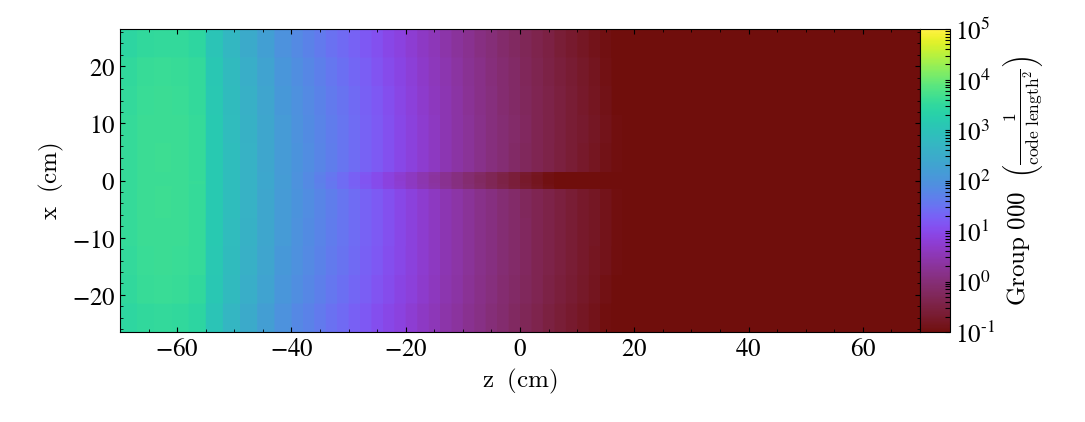

In [41]:
plotb = yt.SlicePlot(ds, "y", "group_000")
plotb.set_log('group_000', True)
plotb.set_zlim('group_000', 1e-1, 1e5)
plotb

yt : [INFO     ] 2018-04-18 14:34:23,273 xlim = 0.000000 50.000000
yt : [INFO     ] 2018-04-18 14:34:23,275 ylim = 0.000000 140.000000
yt : [INFO     ] 2018-04-18 14:34:23,276 xlim = 0.000000 50.000000
yt : [INFO     ] 2018-04-18 14:34:23,277 ylim = 0.000000 140.000000
yt : [INFO     ] 2018-04-18 14:34:23,279 Making a fixed resolution buffer of (('egroup_026', 'flux')) 800 by 800



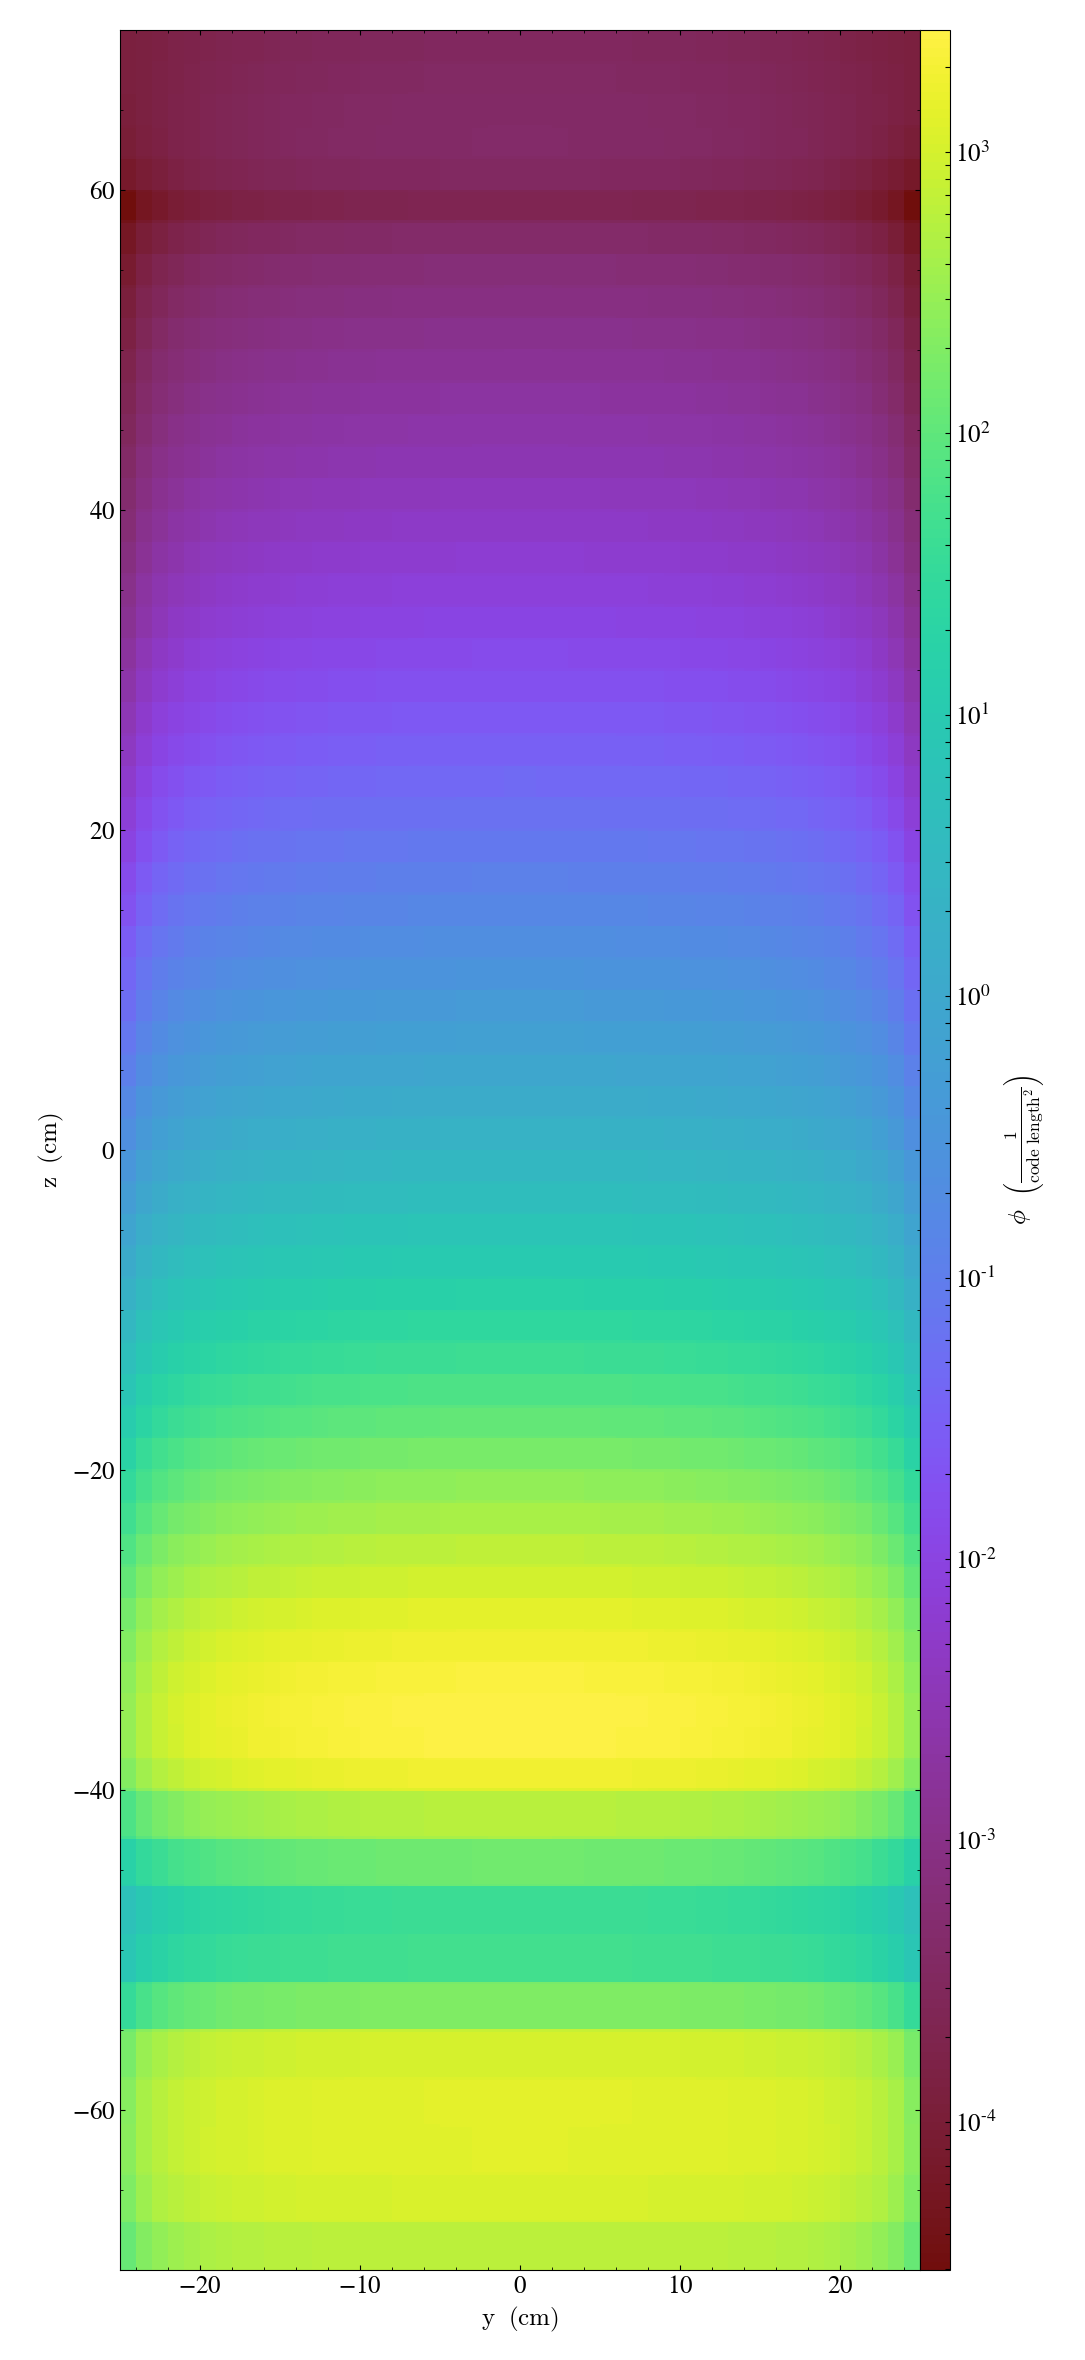

In [9]:
yt.SlicePlot(ds2, "x", "flux")

yt : [INFO     ] 2018-04-18 14:34:32,372 xlim = 0.000000 53.000000
yt : [INFO     ] 2018-04-18 14:34:32,374 ylim = 0.000000 50.000000
yt : [INFO     ] 2018-04-18 14:34:32,376 xlim = 0.000000 53.000000
yt : [INFO     ] 2018-04-18 14:34:32,377 ylim = 0.000000 50.000000
yt : [INFO     ] 2018-04-18 14:34:32,379 Making a fixed resolution buffer of (('egroup_026', 'flux')) 800 by 800



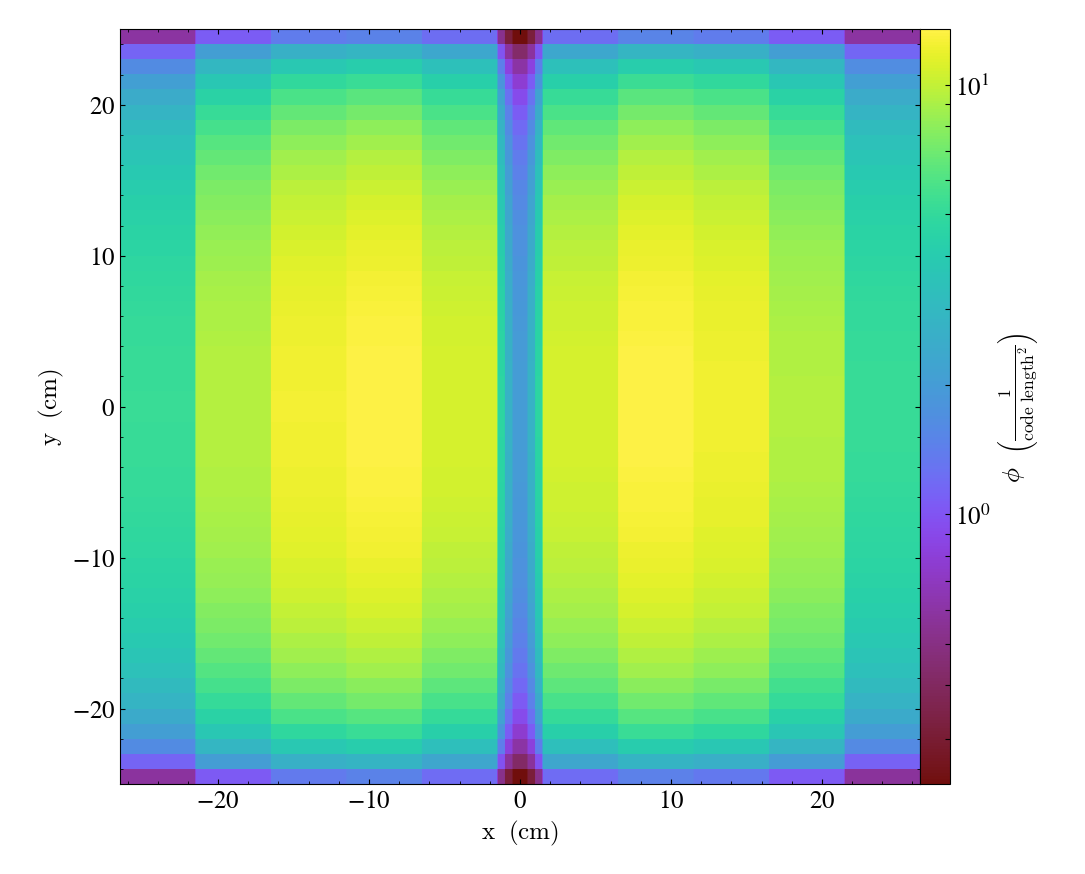

In [10]:
yt.SlicePlot(ds2, "z", "flux")

yt : [INFO     ] 2018-04-18 14:35:11,210 xlim = 0.000000 140.000000
yt : [INFO     ] 2018-04-18 14:35:11,211 ylim = 0.000000 53.000000
yt : [INFO     ] 2018-04-18 14:35:11,212 xlim = 0.000000 140.000000
yt : [INFO     ] 2018-04-18 14:35:11,213 ylim = 0.000000 53.000000
yt : [INFO     ] 2018-04-18 14:35:11,215 Making a fixed resolution buffer of (('egroup_025', 'source')) 800 by 800



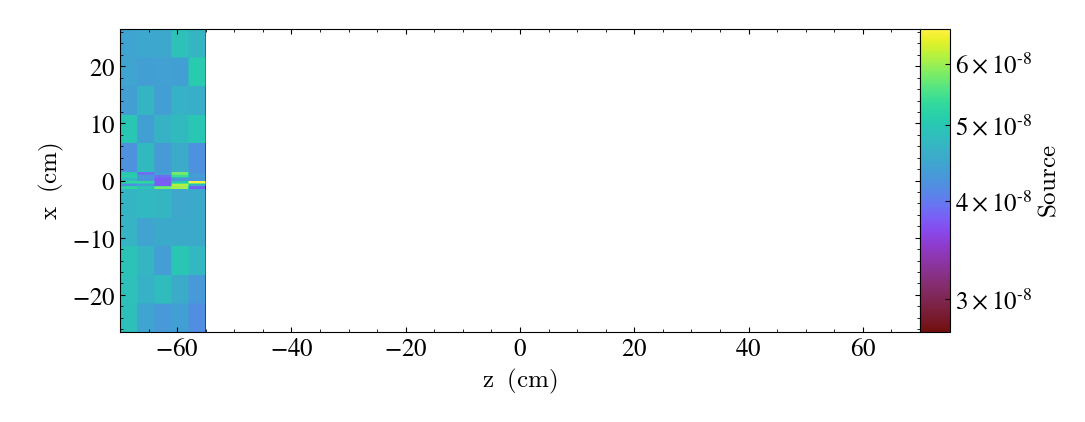

In [11]:
plotd = yt.SlicePlot(ds2, "y", fields=("egroup_025", "source"))
plotd.set_log('source', True)

In [22]:
ds2.r[:]["source"]

yt : [INFO     ] 2018-04-17 14:03:30,513 trying to read in energy group 5


YTArray([ 4538.48894355,  4275.55381584,  4126.93830887, ...,     0.        ,
           0.        ,     0.        ]) (dimensionless)

In [37]:
ds.r[:]["group_005"]

YTArray([ 4538.48894355,  4275.55381584,  4126.93830887, ...,     0.        ,
           0.        ,     0.        ]) code_length**(-2)

In [39]:
type(ds.domain_dimensions)

numpy.ndarray

In [12]:
ds2.derived_field_list

[('denovo', 'cell_volume'),
 ('denovo', 'dx'),
 ('denovo', 'dy'),
 ('denovo', 'dz'),
 ('denovo', 'path_element_x'),
 ('denovo', 'path_element_y'),
 ('denovo', 'path_element_z'),
 ('denovo', 'vertex_x'),
 ('denovo', 'vertex_y'),
 ('denovo', 'vertex_z'),
 ('denovo', 'x'),
 ('denovo', 'y'),
 ('denovo', 'z'),
 ('egroup_000', 'cell_volume'),
 ('egroup_000', 'dx'),
 ('egroup_000', 'dy'),
 ('egroup_000', 'dz'),
 ('egroup_000', 'flux'),
 ('egroup_000', 'path_element_x'),
 ('egroup_000', 'path_element_y'),
 ('egroup_000', 'path_element_z'),
 ('egroup_000', 'source'),
 ('egroup_000', 'vertex_x'),
 ('egroup_000', 'vertex_y'),
 ('egroup_000', 'vertex_z'),
 ('egroup_000', 'x'),
 ('egroup_000', 'y'),
 ('egroup_000', 'z'),
 ('egroup_001', 'cell_volume'),
 ('egroup_001', 'dx'),
 ('egroup_001', 'dy'),
 ('egroup_001', 'dz'),
 ('egroup_001', 'flux'),
 ('egroup_001', 'path_element_x'),
 ('egroup_001', 'path_element_y'),
 ('egroup_001', 'path_element_z'),
 ('egroup_001', 'source'),
 ('egroup_001', 'vertex_

In [16]:
ds2.fields.gas.x

Alias Field for "('index', 'x')" (gas, x): (units: code_length)

In [47]:
print(np.shape(ds2.r['source']))
print(ds2.find_max(['source']))
print(ds2.find_min(['source']))

(52000,)


yt : [INFO     ] 2018-04-13 11:08:41,376 Max Value is 8.53283e+02 at 25.2500000000000000 22.5000000000000000 7.5000000000000000


(853.2833254686838 dimensionless, YTArray([ 25.25,  22.5 ,   7.5 ]) code_length)


yt : [INFO     ] 2018-04-13 11:08:41,416 Min Value is 0.00000e+00 at 2.5000000000000000 0.5000000000000000 16.5000000000000000


(0.0 dimensionless, YTArray([  2.5,   0.5,  16.5]) code_length)


In [48]:
np.shape(ds2.r['flux'])

(52000,)

In [49]:
data['flux'].in_units('1/(cm**(-2))')

KeyError: 'flux'

In [ ]:
dd1 = ds.all_data(); dd2 = ds2.all_data()

In [ ]:
f1 = dd1['group_000']; f2 = dd2['flux']

In [ ]:
np.unique(f1/f2)

In [ ]:
ds.unit_registry['code_length']

In [ ]:
ds2.unit_registry['code_length']

In [ ]:
f3 = dd2['source']

In [ ]:
f3

In [ ]:
ds2.field_list

In [50]:
ds2.parameters.keys()

dict_keys(['block', 'group_bounds_n', 'log', 'mesh_g', 'mesh_x', 'mesh_y', 'mesh_z', 'peak_memory', 'quadrature_angles', 'quadrature_weights', 'silo_output', 'timers'])

In [51]:
if 'mesh_g' in ds2.parameters:
    print(ds2.parameters['mesh_g'])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]


In [52]:
s = 'hello there'
if 'hello' in s:
    print(s)

hello there


In [54]:
s = 'egroup_010'
group_no = int(s.split('_')[-1])
print(group_no)
print(type(group_no))
print(s)

10
<class 'int'>
egroup_010
